In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statistics 
import re
from collections import defaultdict

In [2]:
df=pd.read_csv("NVDAcsvv.csv", decimal = ',')
df.head()

,Date,Open,Close,High,Low,Volume
0,4-Jan-16,32.290001,32.369999,32.580002,32.040001,8951900
1,5-Jan-16,32.98,32.889999,33.439999,32.5,12256800
2,6-Jan-16,32.349998,31.530001,32.5,31.16,11233600
3,7-Jan-16,30.74,30.280001,30.950001,29.879999,16132600
4,8-Jan-16,30.67,29.629999,30.700001,29.57,9961800


In [3]:
df['Open']=df['Open'].astype(float)
df['Close']=df['Close'].astype(float)
df['High']=df['High'].astype(float)
df['Low']=df['Low'].astype(float)

In [4]:
df.describe()

,Open,Close,High,Low,Volume
count,878.000000,878.000000,878.000000,878.000000,8.780000e+02
mean,147.423964,147.361560,149.602779,144.971617,1.396805e+07
std,74.841028,74.703322,75.826815,73.624875,8.135341e+06
min,24.780001,25.219999,25.559999,24.750000,4.382600e+06
25%,84.780001,86.552501,88.335001,83.697502,8.942675e+06
50%,152.584999,151.809998,155.205002,148.904999,1.178865e+07
75%,211.750004,211.002499,214.074997,206.359997,1.635880e+07
max,289.320007,289.359985,292.760010,285.579987,9.232320e+07


In [5]:
##mean for particular columns
dict_mean_value_dataset=defaultdict(list)
list_mean_column=[]
for col in df.columns.values[1:5]:
    x=df[col].astype(float).mean()
    pair=(col,x)
    list_mean_column.append(pair)
    
for k,v in list_mean_column:
    dict_mean_value_dataset[k].append(v)
    
dict_mean_value_dataset

defaultdict(list,
            {'Open': [147.42396354214122],
             'Close': [147.36156018564932],
             'High': [149.60277909111616],
             'Low': [144.97161739635544]})

In [6]:
###standard deviation for particular columns
dict_mean_value_dataset=defaultdict(list)
list_mean_column=[]
for col in df.columns.values[1:5]:
    x=df[col].astype(float)
    y=statistics.stdev(x)
    pair=(col,y)
    list_mean_column.append(pair)
    
for k,v in list_mean_column:
    dict_mean_value_dataset[k].append(v)
    
dict_mean_value_dataset

defaultdict(list,
            {'Open': [74.84102843544969],
             'Close': [74.70332185941812],
             'High': [75.82681540331426],
             'Low': [73.62487542788972]})

### Calculated attributes for finding the moving average

In [7]:
'''Feature Engineering'''

df['AvgOpen-close']=(df['Open'].astype(float)+df['Close'].astype(float))/2
df['AvgHigh-low']=(df['High'].astype(float)+df['Low'].astype(float))/2
df['logValue']=np.log(df['Close'].astype(float))
df['Log_of_volume']=np.log(df['Volume'].astype(float))
df['All_Total']=(df['Open'].astype(float)+df['Close'].astype(float)+df['High'].astype(float)+df['Low'].astype(float))/4
df['Log_Total']=np.log(df['All_Total'].astype(float))
df.head()

,Date,Open,Close,High,Low,Volume,AvgOpen-close,AvgHigh-low,logValue,Log_of_volume,All_Total,Log_Total
0,4-Jan-16,32.290001,32.369999,32.580002,32.040001,8951900,32.330000,32.310001,3.477232,16.007376,32.320001,3.475686
1,5-Jan-16,32.980000,32.889999,33.439999,32.500000,12256800,32.935000,32.970000,3.493169,16.321591,32.952500,3.495067
2,6-Jan-16,32.349998,31.530001,32.500000,31.160000,11233600,31.939999,31.830000,3.450940,16.234420,31.885000,3.462136
3,7-Jan-16,30.740000,30.280001,30.950001,29.879999,16132600,30.510000,30.415000,3.410487,16.596353,30.462500,3.416496
4,8-Jan-16,30.670000,29.629999,30.700001,29.570000,9961800,30.149999,30.135001,3.388787,16.114268,30.142500,3.405936


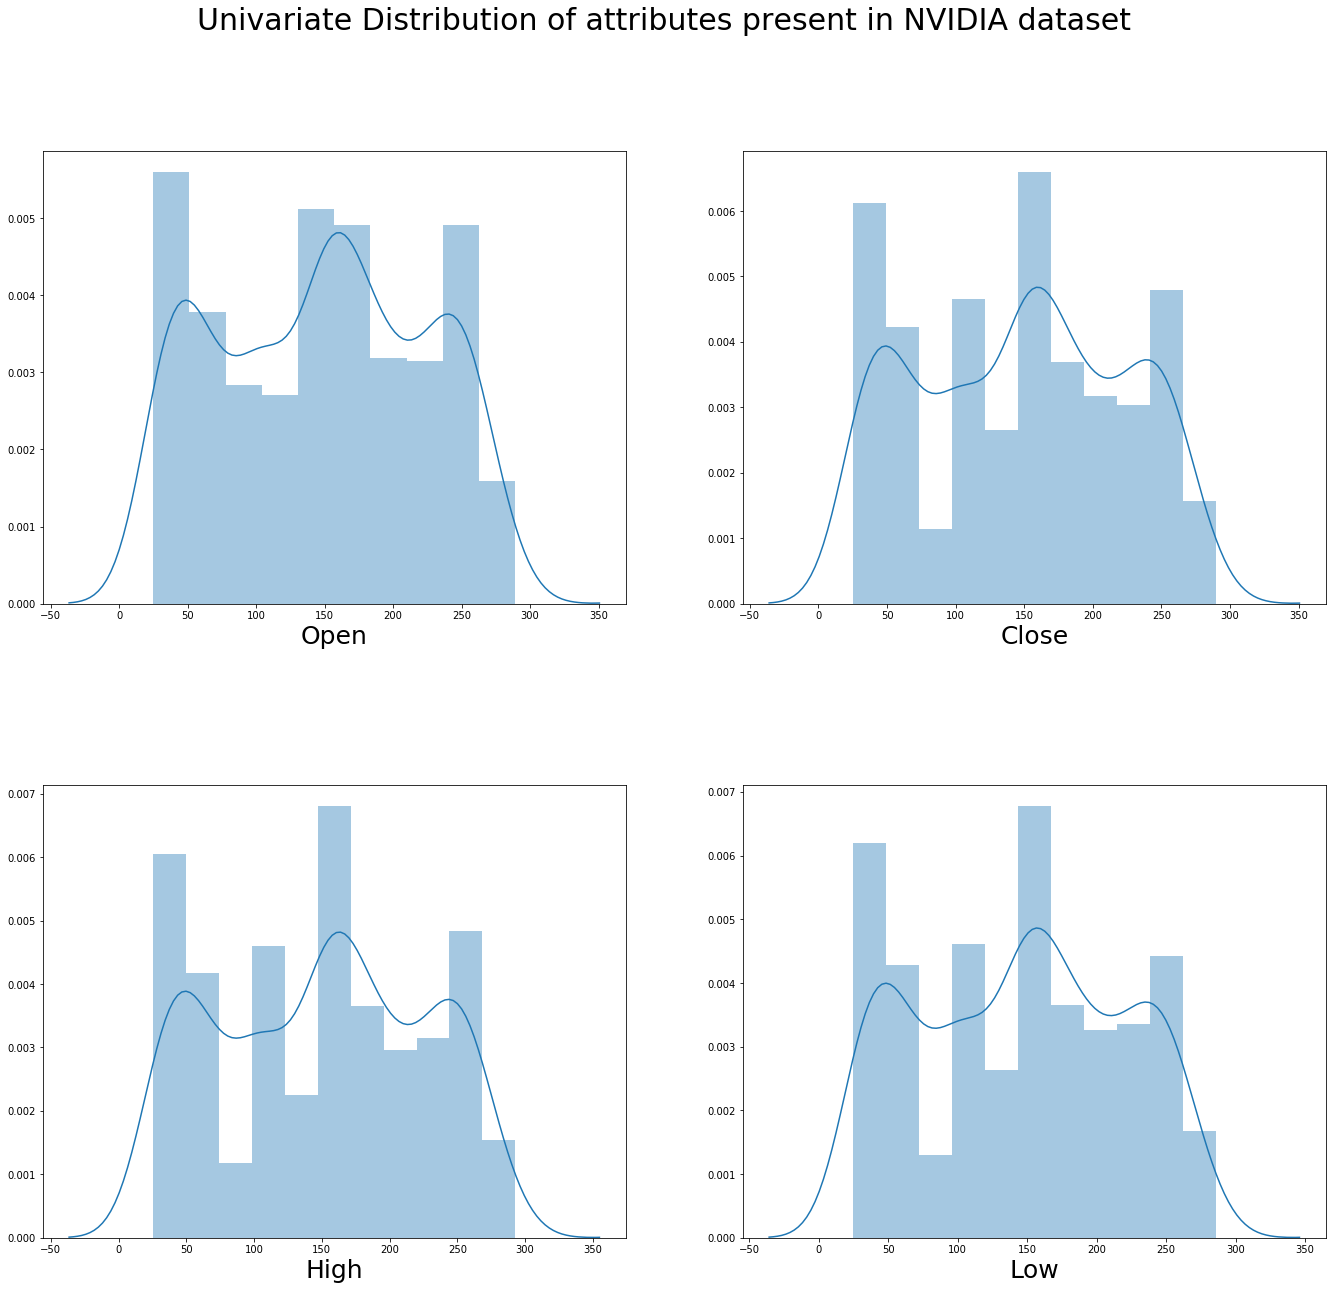

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(23,20))
plt.subplots_adjust(hspace=0.4)

z = pd.Series()
for col in df.columns.values[1:]:
    colums=np.array(df[col])
    z[col]=colums
#p=z.loc[z.index]


for i in range(2):
    for j in range(2):
        
       
        y=z.index[i*2+j]
        x=z[i*2+j].astype(float)
        
        b=sns.distplot(x,ax=axes[i,j])
        b.set_xlabel(y,fontsize=25)

fig.suptitle('Univariate Distribution of attributes present in NVIDIA dataset', fontsize='30')
plt.show()

### Kalman Filter & Smoother

In [9]:
def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
   
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
            v[s]=Y[s-1]-Z*u_predict[s-1]   
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_update[s]; 
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            KF_Dens[s] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(abs(F[s]))+(1/2)*np.transpose(v[s])*(1/F[s])*v[s]     
            Likelihood = np.sum(KF_Dens[1:-1])  
            return Likelihood



In [10]:
def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]

    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
            v[s]=Y[s-1]-Z*u_predict[s-1]   
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_update[s]; 
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q

        u_smooth = np.zeros(S)
        P_smooth = np.zeros(S)
        u_smooth[S-1] = u_update[S-1]
        P_smooth[S-1] = P_update[S-1]    
    for  t in range(S-1,0,-1):
        u_smooth[t-1] = u_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]-T*u_update[t])
        P_smooth[t-1] = P_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_predict[t])/P_predict[t]*T*P_update[t]
    u_smooth = u_smooth[0:-1]
    return u_smooth

### Garch Filter & Smoother

In [11]:
def GARCH(Y):
    "Initialize Params"
    mu= param0[0]
    omega=param0[1]
    alpha=param0[2]
    beta=param0[3]
    T=Y.shape[0]
    GARCH_Dens= np.zeros(T)
    sigma2=np.zeros(T)
    F= np.zeros(T)
    v=np.zeros(T)
    for t in range(1,T):
        sigma2[t]=omega+ alpha * ((Y[t-1]-mu)**2)+beta*(sigma2[t-1])
        F[t]=Y[t]-mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t]=sigma2[t]
        GARCH_Dens[t]=(1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
        (1/2)*(F[t]/v[t])
        Likelihood = np.sum(GARCH_Dens[1:-1])
    return Likelihood
        

In [12]:

def GARCH_Prod(params,Y0,T):
    "Initialize Params"
    mu= param0[0]
    omega=param0[1]
    alpha=param0[2]
    beta=param0[3]
    T=Y.shape[0]
    GARCH_Dens= np.zeros(T)
    sigma2=np.zeros(T)
    F= np.zeros(T)
    v=np.zeros(T)
    for t in range(1,T):
        sigma2[t]=omega+ alpha * ((Y[t-1]-mu)**2)+beta*(sigma2[t-1])
        Y[t]=Y[t]-mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
       
 
    return Y

### For Random Array use of Kalman filters

Optimization terminated successfully.
         Current function value: 4.280007
         Iterations: 4
         Function evaluations: 48
         Gradient evaluations: 8


/Users/manalisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: OptimizeWarning: Unknown solver options: xtol
  after removing the cwd from sys.path.


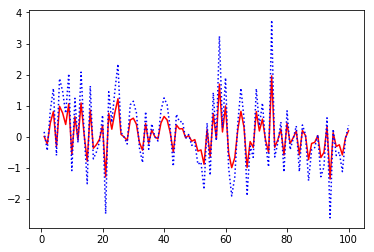

In [13]:
T = 100
Y = np.random.normal(0,1,T)
param0 = np.array([1.3, 0.7, 0.8, 1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)
timevec = np.linspace(1,T,T)
plt.plot(timevec, u,'r',timevec, Y,'b:')

### For Random Array use of Garch filters

         Current function value: 0.555467
         Iterations: 2
         Function evaluations: 160
         Gradient evaluations: 25


/Users/manalisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


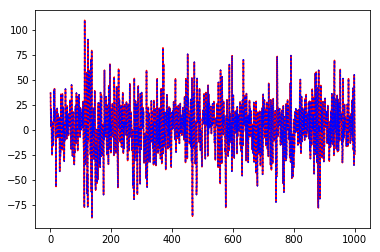

In [14]:
T=1000
mu= 35
sig = 5

Y=np.random.normal(mu,sig,T)
param0=np.array([32,3.5,0.2,0.5])
param_star=minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH=GARCH_Prod(param_star.x,Y[0],T)
timevec=np.linspace(1,T,T)

plt.plot(timevec,Y_GARCH,'r',timevec,Y,'b:')

## Presentation with respect to the closing price for NVIDIA dataset

## For Kalman Filter

In [15]:
Y = (df['Open'].astype(float) + df['Close'].astype(float))/2   ###average of open-close price is our target variable

In [16]:
Open_price=df['Open'].astype(float).to_numpy()

/Users/manalisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: OptimizeWarning: Unknown solver options: xtol
  after removing the cwd from sys.path.


Optimization terminated successfully.
         Current function value: 4.280007
         Iterations: 4
         Function evaluations: 48
         Gradient evaluations: 8


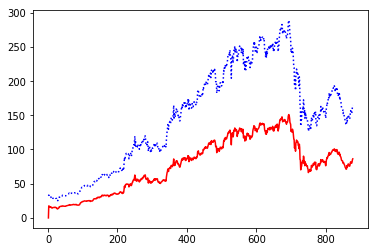

In [17]:
T = 878
#Y = np.random.normal(0,1,T)
param0 = np.array([1.3, 0.7, 0.8, 1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Open_price)
timevec = np.linspace(1,T,T)
plt.plot(timevec, u,'r',timevec, Open_price,'b:')

Optimization terminated successfully.
         Current function value: 2.778158
         Iterations: 3
         Function evaluations: 30
         Gradient evaluations: 5


/Users/manalisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: OptimizeWarning: Unknown solver options: xtol
  """


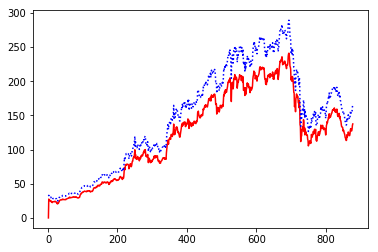

In [18]:
## with changed param0
T = 878
#Y = np.random.normal(0,1,T)
param0 = np.array([1,0.2,0.2,1]) 
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Open_price)
timevec = np.linspace(1,T,T)
plt.plot(timevec, u,'r',timevec, Open_price,'b:')

## For Garch Filter

         Current function value: 0.369051
         Iterations: 1
         Function evaluations: 126
         Gradient evaluations: 19


/Users/manalisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


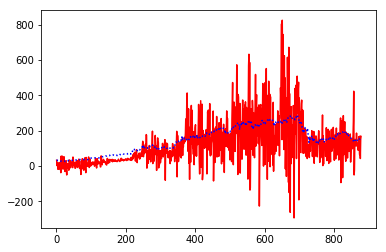

In [19]:
T=878
mu= 35
sig = 5

#Y=np.random.normal(mu,sig,T)
param0=np.array([32,3.5,0.2,0.5])
param_star=minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH=GARCH_Prod(param_star.x,Open_price[0],T)
timevec=np.linspace(1,T,T)

plt.plot(timevec,Y_GARCH,'r',timevec,Open_price,'b:')

## Moving Average

/Users/manalisharma/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


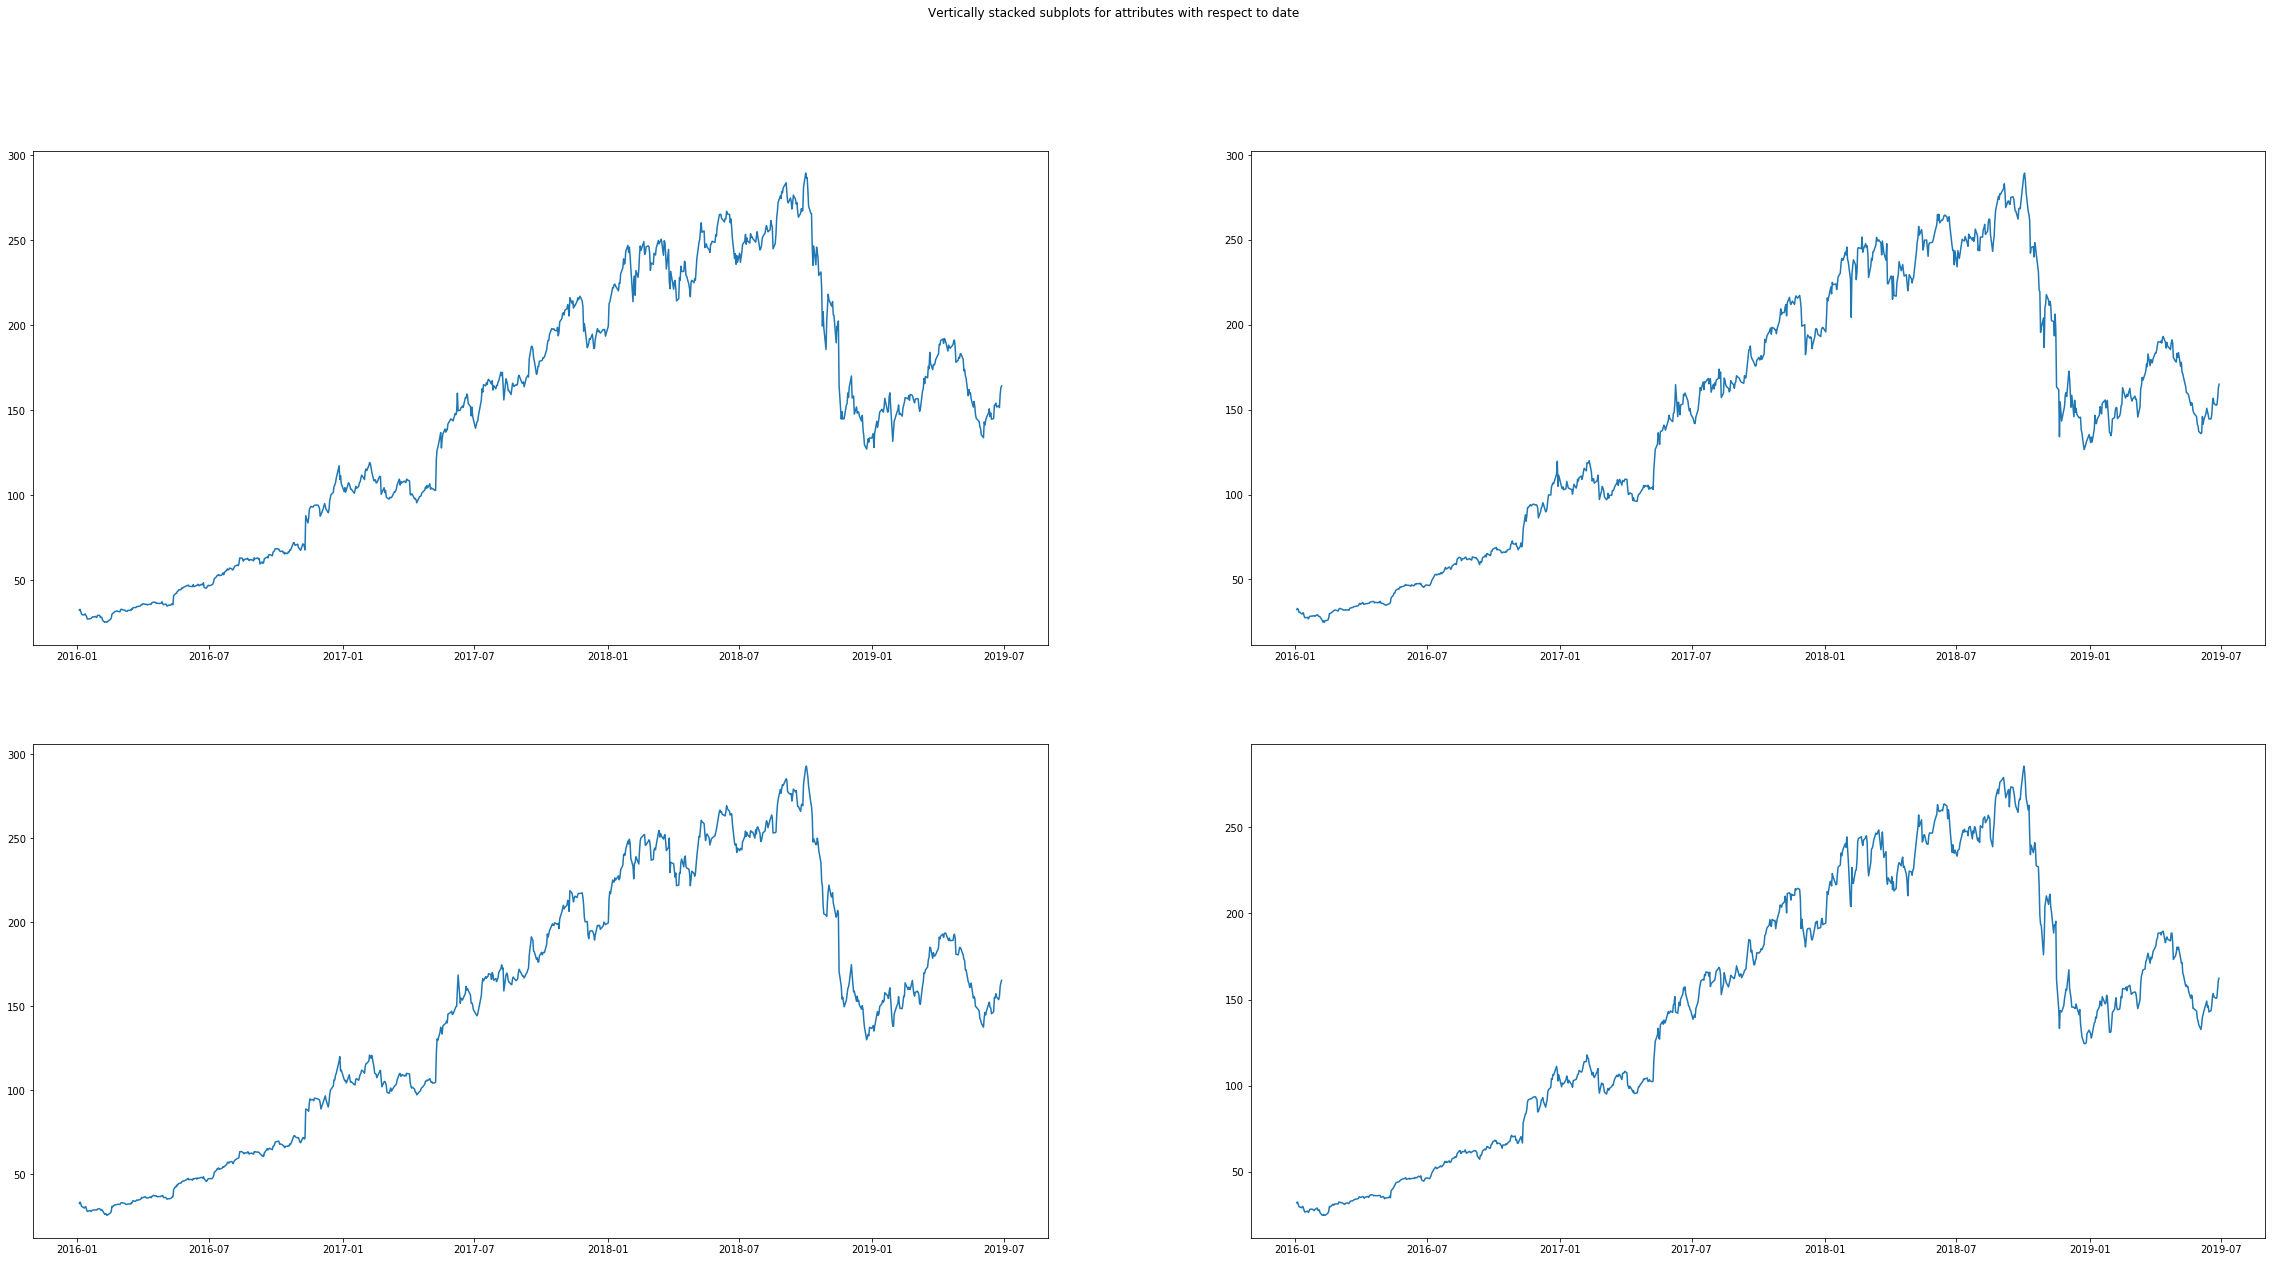

In [20]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%d-%b-%y')
df.index = df['Date']

#fig = plt.figure(figsize=(40,20))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,20))

fig.suptitle('Vertically stacked subplots for attributes with respect to date')
ax1.plot(df['Close'].astype(float))
ax2.plot(df['Open'].astype(float))
ax3.plot(df['High'].astype(float))
ax4.plot(df['Low'].astype(float))

In [21]:
#split into train and validation
train = df[:478]
valid = df[478:]

x_train = train.drop('Open', axis=1)
y_train = train['Open']
x_valid = valid.drop('Open', axis=1)
y_valid = valid['Open']

x = df.drop('Open', axis=1)
y = df['Open']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Open'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Open'][i] = data['Open'][i]
    


In [22]:
#splitting into train and validation
train = new_data[:437]
valid = new_data[438:878]

train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2016-01-04 00:00:00'),
 Timestamp('2017-09-26 00:00:00'),
 Timestamp('2017-09-28 00:00:00'),
 Timestamp('2019-06-28 00:00:00'))

In [23]:
def MovingAvg(x, y):
    preds = []
    df['Open']=df['Open'].astype(float)
    for i in range(0,440):
        a = df['Open'][len(df)-440+i:].sum() + sum(preds)
        b = a/440
        preds.append(b)
    return preds

In [24]:
len(valid['Open'])

440

In [25]:
#make predictions
preds = []
x=[]
train['Open']=train['Open'].astype(float)
for i in range(0,440):
    a= train['Open'][len(train)-437+i:].sum()
    c = a+ sum(preds)
    b = a/440
    preds.append(b)

/Users/manalisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [26]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Open'])-preds),2)))
rms

155.18110642018567

/Users/manalisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/manalisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


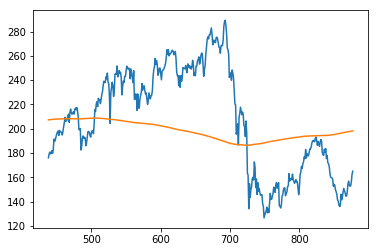

In [27]:
valid['Predictions'] = 0
valid['Predictions'] = MovingAvg(x,y)
MA = plt.plot(valid[['Open', 'Predictions']])